<a href="https://colab.research.google.com/github/rileyseefeldt/MAT421/blob/main/HW9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW 9. Representation of numbers

##9.1 Base N and Binary

Key Terms:

Base 10 (decimal numbers): Typical number system where every index can be represented by a digit of 0-9, where digit represents a coefiicient for a power of 10. Called base 10 because its based on ten digits

Base 2 (binary numbers): Number system where each index is represented by two bits, either 1 or 0, where each digit represents a coeficient for a power of two. Called base 2 because its based on two digits

Base 3 - n: Each number system follows the same general structure as decimal and binary numbers. However each digit has a range of 0-n and represents a coefficient for a power of n.

In [5]:
#binary code example
def binary_to_decimal(number):
  return int(number, 2)


binary = "1010100100111"
number = binary_to_decimal(binary)
print(f"The decimal value of {binary} is {number}")

The decimal value of 1010100100111 is 5415


##9.2 Floating Point Numbers

Many modern computations require numbers more complex and with a larger range than typical binary numbers. For example, (in their default representation) binary numbers are unable to represent fractions, exponents, and negative numbers. The solution to this problem is Floating Point Numbers, which are typically 64 bit numbers with 1 bit allocated to the sign exponent, 11 allocated to the exponent, and 52 bits allocated to the fraction.


A float is represented as (ieee754 standard):

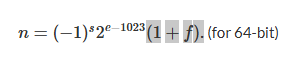

where s represents the signed bit, e represents the exponential bit, and f represents the fraction bit

In [24]:
#floating point
import numpy as np

def float_to_binary(number):
  #uses numpy library to convert float to binary representation
  return format(np.frombuffer(np.float64(number).tobytes(), dtype=np.uint64)[0], '064b')

def binary_to_float(number):
  number = int(number, 2)

  #gets 64th bit
  s = (number >> 63) & 0x1
  ##gets next 11 bits
  e = (number // (2**52)) % (2**11)
  #fetches remaining 52 bits
  f = number % (2**52)

  #normalizes fraction
  f_value = f / (2**52)

  return s, e, f_value

def to_float(s,e,f):
  return ((-1)**s)*(2**(e-1023))*(1+f)

number = 5.9123908
binary = float_to_binary(number)
print(f"Binary representation of {number}, {binary}")
s,e,f = binary_to_float(binary)
print(f"Coefficients s = {s} e = {e} f = {f}")
number1 = to_float(s,e,f)
print(f"Plugging this into the float equation reveals the number {number1}")

Binary representation of 5.9123908, 0100000000010111101001100100100111000110000111001010111101100011
Coefficients s = 0 e = 1025 f = 0.47809769999999996
Plugging this into the float equation reveals the number 5.9123908


##9.3 Round-off Erros

Because floats are technically represented as 64bit binary numbers in computers, the entire range of all numbers can't be expressed due to "round-off" errors. Therefore every number can't be stored with perfect precision and are approximated up to a certain decimal value. The difference between the approximated and the "actual" number is called Round-Off error

In [26]:
import numpy as np

#round off error demonstration

a = 0.1
b = 0.2
c = 0.3
result = a + b
print(f"0.1 + 0.2 = 0.3 {result == c}")
print(f"Difference {result - c}")

0.1 + 0.2 = 0.3 False
Difference 5.551115123125783e-17
